#ITM
Curso: Visión artificial

Docente: Mateo Rico Garcia

# Clase 06: Ruido espacial

Contenido:
- Solución parcial 1.
- Ruido espacial, concepto.
- Tratamiento del ruido espacial


#1. Ruido espacial en imágenes:
El ruido digital es la variación aleatoria del brillo o el color en las imágenes digitales producido por el dispositivo de entrada (la cámara digital en este caso).

En imágenes digitales, el ruido es, por lo general, antiestético e indeseable. Es por ello que se desarrollan algoritmos que conduzcan a su eliminación, o en su defecto, corrección.

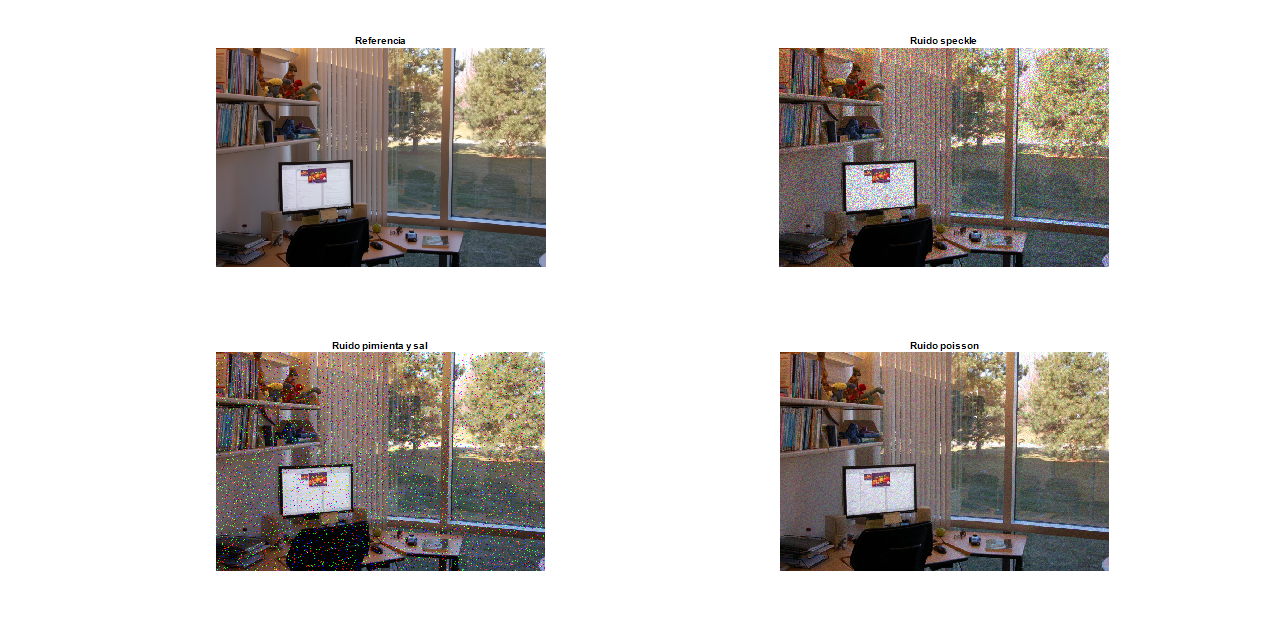

A manera de datos, el ruido se puede entender como sigue:

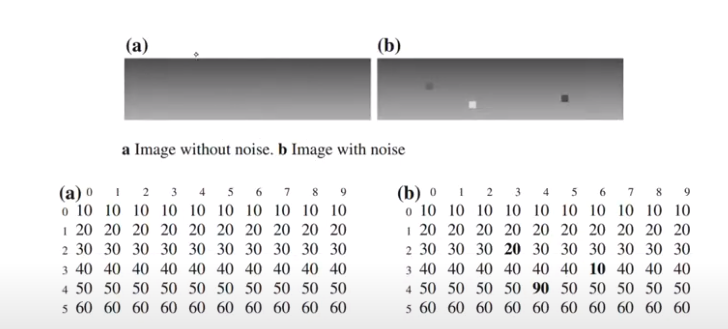

Dentro de las maneras más convencionales de corrección de ruido en imágenes digitales, algoritmos basados en el promedio de vecinos son ampliamente utilizados. 

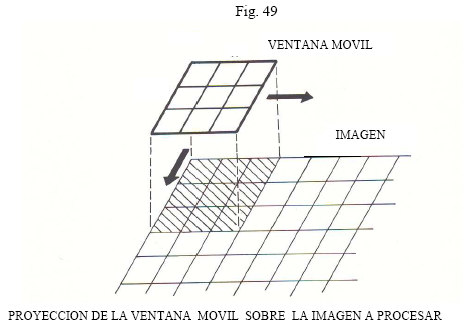

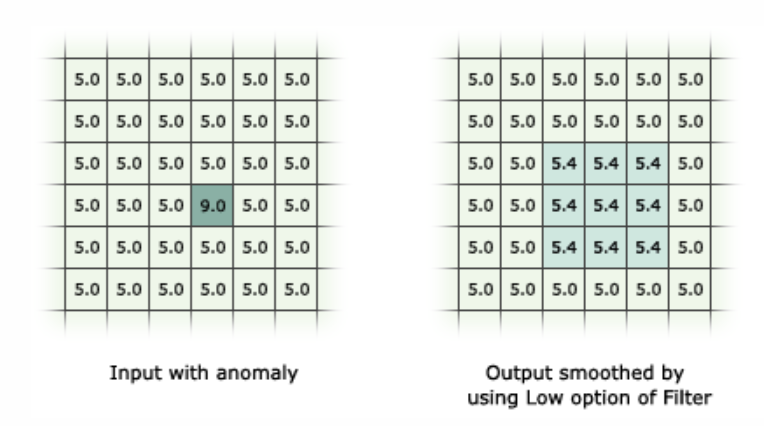

# 3. Promedio de vecinos en python:

Mostrando imagen con ruido


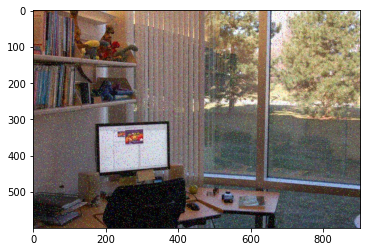


Imagen mejorada


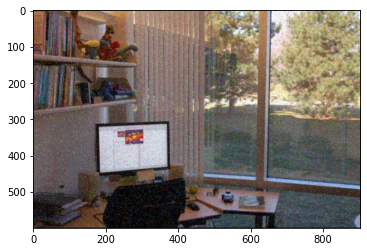

In [2]:
#Algoritmo para 4 vecinos
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios

#=============================================================================
#Leyendo y mostranso imagen de referencia con ruido
Ruta_2 = r'/content/drive/My Drive/1_CLASS/VAR84/06/office_3.jpg'#Ubicación de la imagen desde el google drive
Imagen_2 = cv2.imread(Ruta_2)#Lee
Imagen_2=Imagen_2[:,:,[2,1,0]]#Organiza
print('Mostrando imagen con ruido')
plt.imshow(Imagen_2.astype('uint8'),vmin=0, vmax=255) #Muestra
plt.show()
print('')

#=============================================================================
#Mejorando problemas de ruido con 4 vecinos
[Fl, Cl, Ch]=Imagen_2.shape #Genera dos variables para almacenar el número de filas y Columnas 
Resultado=np.zeros((Fl,Cl,Ch))

for k in range(0, Ch, 1):#Canales
  for j in range(1, Cl-1, 1):#Columnas
    for i in range(1, Fl-1, 1):#Filas
      Sup=float(Imagen_2[i-1,j,k]) #Arriba
      Inf=float(Imagen_2[i+1,j,k]) #Abajo
      Der=float(Imagen_2[i,j+1,k]) #Derecha
      Izq=float(Imagen_2[i,j-1,k]) #Inzquierda

      Resultado[i,j,k]= (Sup + Inf + Der + Izq)/4

      if Resultado[i,j,k]>255:
         Resultado[i,j,k]=255
  
      if Resultado[i,j,k]<0:
         Resultado[i,j,k]=0

print('Imagen mejorada')
plt.imshow(Resultado.astype('uint8'),vmin=0, vmax=255) #Grafica la imagen
plt.show()
print('')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ahora, provemos con 8 vecinos

Mostrando imagen con ruido


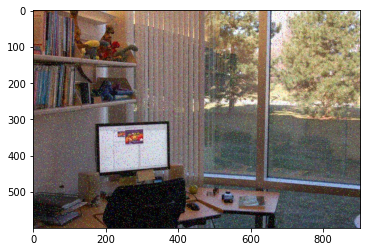


Imagen mejorada


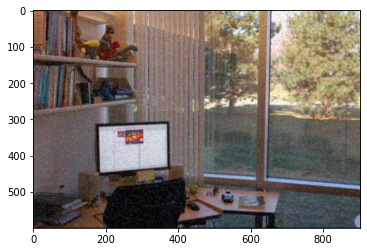

In [3]:
#Algoritmo para 8 vecinos
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios

#=============================================================================
#Leyendo y mostranso imagen de referencia con ruido
Ruta_2 = r'/content/drive/My Drive/1_CLASS/VAR84/06/office_3.jpg'#Ubicación de la imagen desde el google drive
Imagen_2 = cv2.imread(Ruta_2)#Lee
Imagen_2=Imagen_2[:,:,[2,1,0]]#Organiza
print('Mostrando imagen con ruido')
plt.imshow(Imagen_2.astype('uint8'),vmin=0, vmax=255) #Muestra
plt.show()
print('')

#=============================================================================
#Mejorando problemas de ruido con 8 vecinos
[Fl, Cl, Ch]=Imagen_2.shape #Genera dos variables para almacenar el número de filas y Columnas 
Resultado_2=np.zeros((Fl,Cl,Ch))

for k in range(0, Ch, 1):
  for j in range(1, Cl-1, 1):
    for i in range(1, Fl-1, 1):
      Sup=float(Imagen_2[i-1,j,k])
      Sup_I=float(Imagen_2[i-1,j-1,k])
      Sup_D=float(Imagen_2[i-1,j+1,k])
      Inf=float(Imagen_2[i+1,j,k])
      Inf_D=float(Imagen_2[i+1,j+1,k])
      Inf_I=float(Imagen_2[i+1,j-1,k])
      Der=float(Imagen_2[i,j+1,k])
      Izq=float(Imagen_2[i,j-1,k])
      Cen=float(Imagen_2[i,j,k])
      
      Resultado_2[i,j,k]= (Sup + Sup_I + Sup_D + Inf + Inf_D + Inf_I + Der + Izq + Cen)/9

      if Resultado_2[i,j,k]>255:
         Resultado_2[i,j,k]=255

      if Resultado_2[i,j,k]<0:
         Resultado_2[i,j,k]=0

print('Imagen mejorada')
plt.imshow(Resultado_2.astype('uint8'),vmin=0, vmax=255) #Grafica la imagen en campo de grises
plt.show()
print('')

Corriendo el algoritmo varias veces (Ojo: uso de funciones en python)

Mostrando imagen con ruido


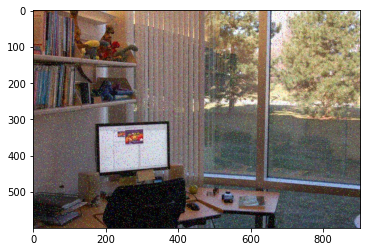


Imagen mejorada 1 veces


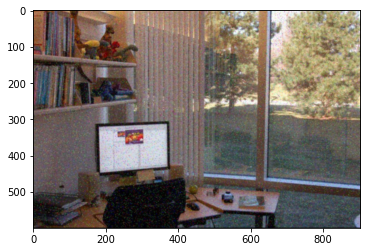


Imagen mejorada 2 veces


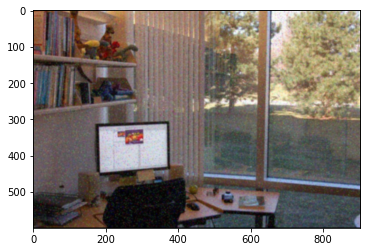


Imagen mejorada 3 veces


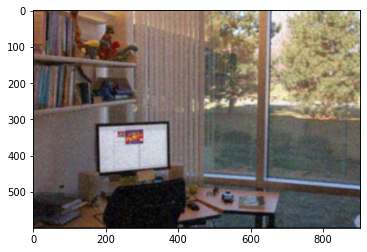


Imagen mejorada 4 veces


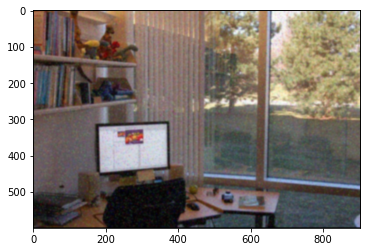


Imagen mejorada 5 veces


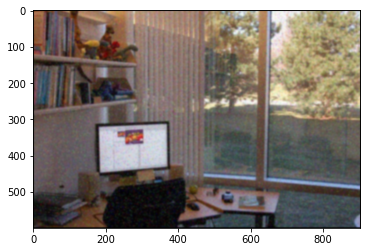


Imagen mejorada 6 veces


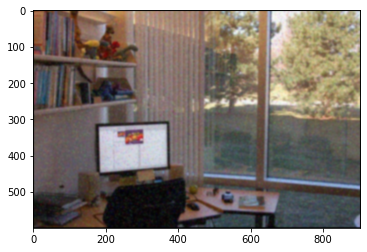


Imagen mejorada 7 veces


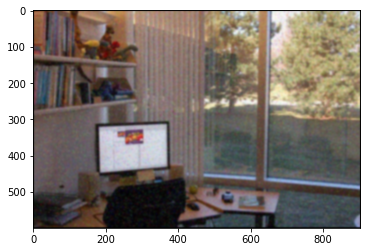


Imagen mejorada 8 veces


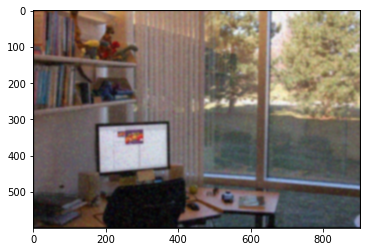


Imagen mejorada 9 veces


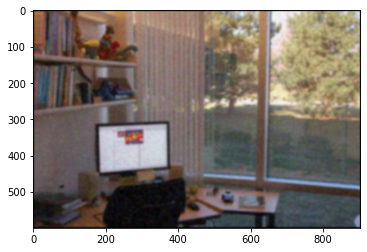


Imagen mejorada 10 veces


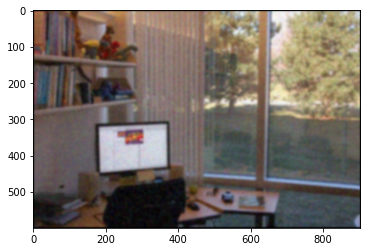

In [4]:
#Algoritmo para 8 vecinos
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios

#=============================================================================
#Definiendo función para mejora de ruido basada en promedio de ocho vecinos
def O_vecinos(Imagen):
  global Resultado
  [Fl, Cl, Ch]=Imagen.shape #Genera dos variables para almacenar el número de filas y Columnas 
  Resultado=np.zeros((Fl,Cl,Ch))

  for k in range(0, Ch, 1):
    for j in range(1, Cl-1, 1):
      for i in range(1, Fl-1, 1):
        Sup=float(Imagen[i-1,j,k])
        Sup_I=float(Imagen[i-1,j-1,k])
        Sup_D=float(Imagen[i-1,j+1,k])
        Inf=float(Imagen[i+1,j,k])
        Inf_D=float(Imagen[i+1,j+1,k])
        Inf_I=float(Imagen[i+1,j-1,k])
        Der=float(Imagen[i,j+1,k])
        Izq=float(Imagen[i,j-1,k])
      
        Resultado[i,j,k]= (Sup + Sup_I + Sup_D + Inf + Inf_D + Inf_I + Der + Izq)/8

        if Resultado[i,j,k]>255:
          Resultado[i,j,k]=255

        if Resultado[i,j,k]<0:
           Resultado[i,j,k]=0
#=============================================================================

#Leyendo y mostranso imagen de referencia con ruido
Ruta_2 = r'/content/drive/My Drive/1_CLASS/VAR84/06/office_3.jpg'#Ubicación de la imagen desde el google drive
Imagen_2 = cv2.imread(Ruta_2)#Lee
Imagen_2=Imagen_2[:,:,[2,1,0]]#Organiza
print('Mostrando imagen con ruido')
plt.imshow(Imagen_2.astype('uint8'),vmin=0, vmax=255) #Muestra
plt.show()
print('')

#=============================================================================
#Mejorando problemas de ruido con 8 vecinos
Resultado=Imagen_2
for veces in range(0,10,1):
  O_vecinos(Resultado)
  print('Imagen mejorada', veces+1, 'veces')
  plt.imshow(Resultado.astype('uint8'),vmin=0, vmax=255) #Grafica la imagen en campo de grises
  plt.show()
  print('')


Actividad:
- Aplique los algoritmos de la clase, sobre un conjunto de imágenes propuesta por usted, analice los resultados.
- Realice un algoritmo para filtrar ruido considerando 24 y 48 vecinos. Analice los resulttados en diferentes tipos de imágenes. 